# Linear Regression Challenge: Boston House Prices Dataset

Begin with the standard imports

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd  

In [ ]:
# load scikit-learn's datasets
from sklearn.datasets import load_boston

In [ ]:
# Load the boston dataset
boston = load_boston()

In [ ]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Challenge 1

Fit a linear regression model using all samples, but only the first **two** features, namely, the number of crimes per resident, and the proportion of large lots. Print the model coefficients. All other things being equal, on average, how much is the value of a house reduced if the crime rate goes up by one crime per capita? Compare the prediction of the model for the prices of the first 5 houses versus their true values.

In [ ]:
X = boston.data[:,:2]
y = boston.target
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(X,y)
print(model.intercept_)
print(model.coef_)
print("If crime increases by 1 per capita, values goes down by $",  model.coef_[0]*-1000)

true = y[:5]
calculated = model.predict(X[:5])
print(true - calculated)

22.485628113468223
[-0.35207832  0.11610909]
If crime increases by 1 per capita, values goes down by $ 352.07831564026765
[-0.57336663 -0.87601285 12.2239801  10.92576866 13.73868289]


## Challenge 2

Repeat the same exercise as above, but use **all** available features and include non-linear terms up to fourth order via *PolynomialFeatures*. Compare again the prices of the first 5 houses. Do you think the model is overfitting?

In [ ]:
x = boston.data
y = boston.target
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(4)
X = poly.fit_transform(x)
model.fit(X,y)
print(model.intercept_)
print(model.coef_)

true = y[:5]
calculated = model.predict(X[:5])
print(true - calculated)

print("Model is overfitting")

-179.01825791309895
[ 1.37581882e-09  9.00230142e-09 -7.68389213e-10 ...  5.02296935e-06
 -3.28034979e-05 -1.17454674e-03]
[4.19476009e-10 6.17383478e-10 5.00605779e-10 4.47123227e-10
 5.16976684e-10]
Model is overfitting


## Challenge 3

Repeat the first challenge, but this time let us pick the two **most relevant** features. For this purpose, we will look at the correlation matrix between the variables. For convenience, let's create a pandas dataframe

In [ ]:
bostondf = pd.DataFrame(boston.data, columns=boston.feature_names)
bostondf['MEDV'] = boston.target
bostondf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


which allows us to use the *corr* function from the pandas library.

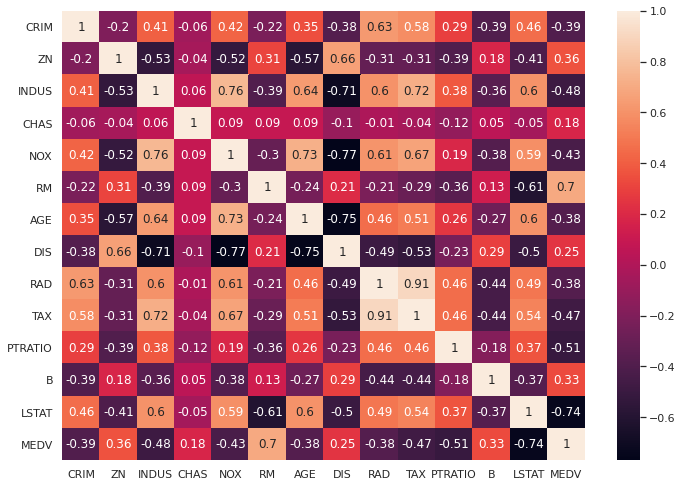

In [ ]:
# set the size of the figure
sns.set(rc={'figure.figsize':(11.7,8.27)})

# compute the pair wise correlation for all columns  
correlation_matrix = bostondf.corr().round(2)

# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

Remember that we want to predict the target variable "median value" *MEDV*. Which feature variables are best correlated with *MEDV* (either positively or negatively)? Does that make sense? Now use the two features best correlated with *MEDV* to repeat challenge 1 (also show a scatter plot of each versus *MEDV*).

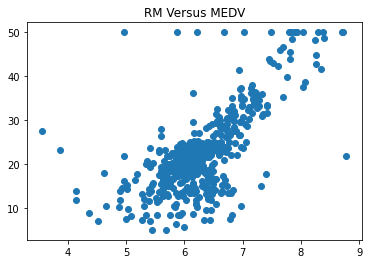

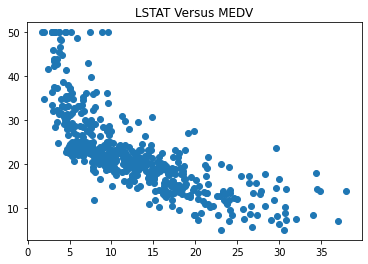

24.70720085105478
[ 0.0689066  -0.30262487]
[ 0.78289255 -1.48452592 11.4462016  10.14633338 12.92174581]


In [ ]:
# Two with strongest correlation are LSTAT and RM (12,5)
plt.scatter(boston.data[:,5],boston.target)
plt.title("RM Versus MEDV")
plt.show()
plt.scatter(boston.data[:,12],boston.target)
plt.title("LSTAT Versus MEDV")
plt.show()

X = np.append(boston.data[:,5],boston.data[:,12])
X = X.reshape(506,2)

y = boston.target
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(X,y)
print(model.intercept_)
print(model.coef_)

true = y[:5]
calculated = model.predict(X[:5])
print(true - calculated)
